## Import

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [66]:
climate = pd.read_csv('Climate_Zone_of_each_country.csv')
food_balance = pd.read_csv('FAOSTAT_data_Food_Balance_2009-2013.csv')
food_balance2 = pd.read_csv('FAOSTAT_data_Food_Balance_2014-2018.csv')
fertilizer = pd.read_csv('FAOSTAT_Fertilizer.csv')
pesticides = pd.read_csv('FAOSTAT_Pesticides.csv')

In [67]:
crop = pd.read_csv('Production_Crops_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')

# Data Pre-processing

### Climate Zone

In [68]:
c = climate['Climate Zone'].unique()
#print(c)
c =pd.DataFrame(c,columns=['Climate_Zone'])
climate.drop(climate[(climate['Country']=="Antarctica")].index | climate[(climate['Country']=="Arctic Ocean" )].index | climate[(climate['Country']=="Atlantic Ocean" )].index,axis=0,inplace=True)
climate.drop(climate[(climate['Climate Zone']=="tropical; hot, humid; rainy season (May to November) has strong southeast winds; dry season (December to April) dominated by hot, dry, harmattan wind")].index | climate[(climate['Climate Zone']=="Saint Helena - tropical; marine; mild, tempered by trade winds; Tristan da Cunha - temperate; marine, mild, tempered by trade winds (tends to be cooler than Saint Helena)" )].index,axis=0,inplace=True)
climate.isnull().values.any()
#True
climate.dropna(inplace=True)
climate.isnull().values.any()
#False

False

### Food Balance

In [69]:
frames = [food_balance,food_balance2]
food_balance=pd.concat(frames)
food_balance = food_balance.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Flag','Flag Description','Unit'],axis=1)
food_balance.isnull().values.any()
#fb = food_balance.groupby(['Area','Item'])['Value'].sum()

False

### Fertilizers

In [70]:
fertilizer.isnull().values.any()

False

### Pesticides

In [71]:
pesticides.isnull().values.any()

False

### Crops

In [72]:
crop = crop[:37790]
crops=crop[['Area','Item','Unit','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018']]
crops_area_sum = crop.fillna(0)
crop.fillna(0,inplace=True)
crops = crops[crops['Unit']=="tonnes"]
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
5,Afghanistan,"Anise, badian, fennel, coriander",tonnes,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18040.0,19180.0,18143.0
8,Afghanistan,Apples,tonnes,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0,217192.0
11,Afghanistan,Apricots,tonnes,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0,18510.0
14,Afghanistan,Barley,tonnes,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0,56781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,Zimbabwe,"Pulses, Total",tonnes,34394.0,35744.0,20737.0,26185.0,34333.0,19941.0,19910.0,14899.0,19488.0,18346.0
37780,Zimbabwe,"Roots and Tubers, Total",tonnes,265301.0,274446.0,279697.0,286200.0,291200.0,295590.0,303924.0,308936.0,314633.0,320323.0
37783,Zimbabwe,Sugar Crops Primary,tonnes,2338300.0,2692000.0,3058000.0,3929056.0,3960000.0,3856000.0,3348000.0,3483000.0,3452116.0,3305073.0
37786,Zimbabwe,"Treenuts, Total",tonnes,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0


In [73]:
crops = crops.fillna(0)
filter_column = list(crops)
#print(filter_column)
filter_column.remove('Area')
filter_column.remove('Item')
filter_column.remove('Unit')
crops['sum_crops'] = crops[filter_column].sum(axis=1)
print(filter_column)

['Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']


## Data Exploration 

### Climate Zone

In [74]:
print(climate.shape)
print(climate.info())
climate.describe()

(252, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 276
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       252 non-null    object
 1   Climate Zone  252 non-null    object
 2   Description   252 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB
None


,Country,Climate Zone,Description
count,252,252,252
unique,252,84,241
top,Martinique,tropical,"Mediterranean with hot, dry summers and cool w..."
freq,1,76,3


### Food Balance

In [75]:
print(food_balance.shape)
print(food_balance.info())
food_balance.describe()

(145200, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145200 entries, 0 to 74518
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     145200 non-null  object 
 1   Element  145200 non-null  object 
 2   Item     145200 non-null  object 
 3   Year     145200 non-null  int64  
 4   Value    145200 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.6+ MB
None


,Year,Value
count,145200.000000,145200.000000
mean,2013.565689,426.534277
std,2.873619,5985.675326
min,2009.000000,-246.000000
25%,2011.000000,0.000000
50%,2014.000000,4.000000
75%,2016.000000,50.000000
max,2018.000000,455116.000000


### Fertilizers

In [76]:
print(fertilizer.shape)
print(fertilizer.info())
fertilizer.describe()

(4675, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4675 non-null   object 
 1   Domain            4675 non-null   object 
 2   Area Code         4675 non-null   int64  
 3   Area              4675 non-null   object 
 4   Element Code      4675 non-null   int64  
 5   Element           4675 non-null   object 
 6   Item Code         4675 non-null   int64  
 7   Item              4675 non-null   object 
 8   Year Code         4675 non-null   int64  
 9   Year              4675 non-null   int64  
 10  Unit              4675 non-null   object 
 11  Value             4675 non-null   float64
 12  Flag              4675 non-null   object 
 13  Flag Description  4675 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 511.5+ KB
None


,Area Code,Element Code,Item Code,Year Code,Year,Value
count,4675.000000,4675.0,4675.000000,4675.000000,4675.000000,4675.000000
mean,127.974759,5159.0,3102.998930,2013.525561,2013.525561,32.674483
std,76.969078,0.0,0.817151,2.867182,2.867182,45.099648
min,1.000000,5159.0,3102.000000,2009.000000,2009.000000,0.000000
25%,59.000000,5159.0,3102.000000,2011.000000,2011.000000,3.460000
50%,126.000000,5159.0,3103.000000,2014.000000,2014.000000,14.710000
75%,195.000000,5159.0,3104.000000,2016.000000,2016.000000,44.110000
max,351.000000,5159.0,3104.000000,2018.000000,2018.000000,399.570000


### Pesticides

In [77]:
print(pesticides.shape)
print(pesticides.info())
pesticides.describe()

(20967, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20967 entries, 0 to 20966
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       20967 non-null  object
 1   Domain            20967 non-null  object
 2   Area Code         20967 non-null  int64 
 3   Area              20967 non-null  object
 4   Element Code      20967 non-null  int64 
 5   Element           20967 non-null  object
 6   Item Code         20967 non-null  int64 
 7   Item              20967 non-null  object
 8   Year Code         20967 non-null  int64 
 9   Year              20967 non-null  int64 
 10  Unit              20967 non-null  object
 11  Value             20967 non-null  int64 
 12  Flag              20967 non-null  object
 13  Flag Description  20967 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB
None


,Area Code,Element Code,Item Code,Year Code,Year,Value
count,20967.000000,20967.0,20967.000000,20967.000000,20967.000000,2.096700e+04
mean,127.538513,5157.0,1331.348309,2013.366624,2013.366624,5.044289e+03
std,71.746828,0.0,15.274167,2.846923,2.846923,6.901964e+04
min,1.000000,5157.0,1309.000000,2009.000000,2009.000000,0.000000e+00
25%,68.000000,5157.0,1320.000000,2011.000000,2011.000000,1.000000e+00
50%,126.000000,5157.0,1331.000000,2013.000000,2013.000000,3.700000e+01
75%,194.000000,5157.0,1345.000000,2016.000000,2016.000000,4.530000e+02
max,351.000000,5157.0,1357.000000,2018.000000,2018.000000,1.815690e+06


### Crops

In [78]:
print(crops.shape)
print(crops.info())
crops.describe()

(12945, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12945 entries, 2 to 37789
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       12945 non-null  object 
 1   Item       12945 non-null  object 
 2   Unit       12945 non-null  object 
 3   Y2009      12945 non-null  float64
 4   Y2010      12945 non-null  float64
 5   Y2011      12945 non-null  float64
 6   Y2012      12945 non-null  float64
 7   Y2013      12945 non-null  float64
 8   Y2014      12945 non-null  float64
 9   Y2015      12945 non-null  float64
 10  Y2016      12945 non-null  float64
 11  Y2017      12945 non-null  float64
 12  Y2018      12945 non-null  float64
 13  sum_crops  12945 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.5+ MB
None


,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
count,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04,1.294500e+04
mean,1.497243e+06,1.522433e+06,1.602595e+06,1.617471e+06,1.685953e+06,1.718609e+06,1.736044e+06,1.755016e+06,1.790426e+06,1.790674e+06,1.671646e+07
std,1.538247e+07,1.576217e+07,1.641910e+07,1.653027e+07,1.728912e+07,1.730768e+07,1.793518e+07,1.828204e+07,1.819396e+07,1.828484e+07,1.711063e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.950000e+02,7.010000e+02,7.270000e+02,7.450000e+02,7.510000e+02,7.580000e+02,7.890000e+02,8.140000e+02,8.000000e+02,8.070000e+02,9.028000e+03
50%,1.332900e+04,1.370400e+04,1.409300e+04,1.406400e+04,1.438400e+04,1.474000e+04,1.493900e+04,1.518100e+04,1.525900e+04,1.551100e+04,1.546560e+05
75%,1.515300e+05,1.522070e+05,1.580140e+05,1.580920e+05,1.613540e+05,1.620000e+05,1.640000e+05,1.639930e+05,1.688700e+05,1.720350e+05,1.662879e+06
max,6.916061e+08,7.174638e+08,7.340061e+08,7.210773e+08,7.680904e+08,7.361085e+08,7.502903e+08,7.685942e+08,7.586462e+08,7.468282e+08,7.392711e+09


# Data Visualization

### Climate Zone

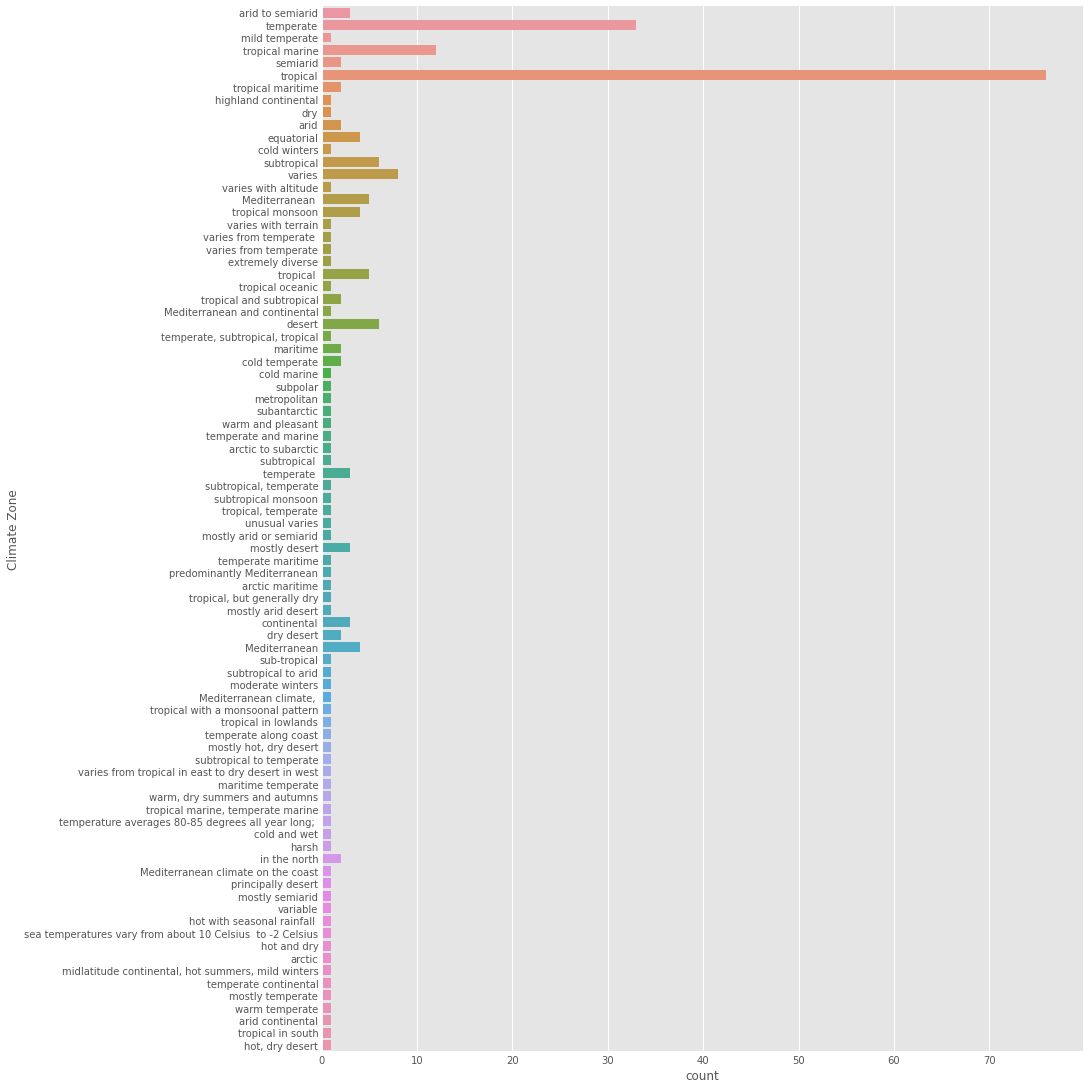

In [79]:
sns.catplot(y = "Climate Zone",kind="count",data = climate, height=15, aspect=1)

### Food Balance

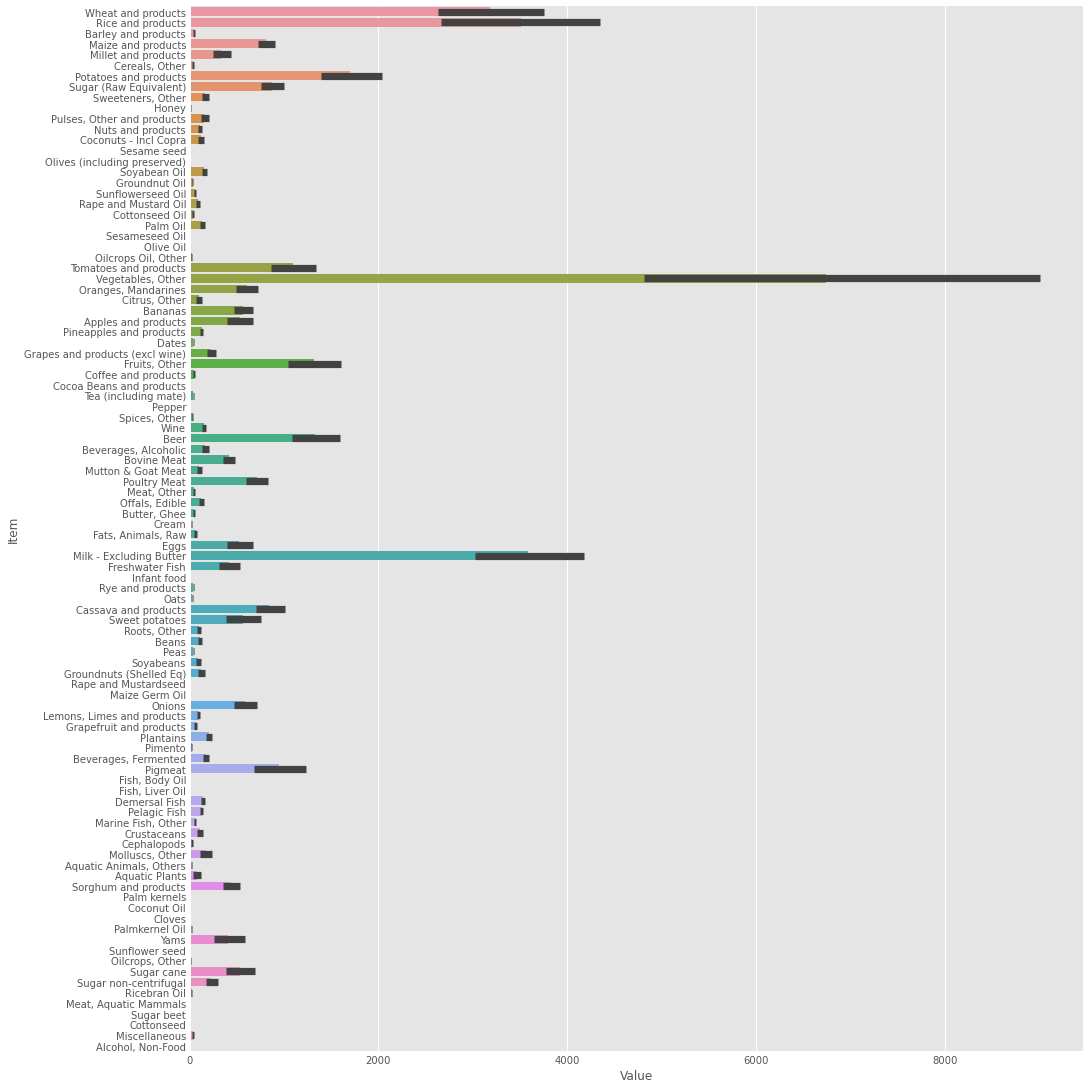

In [80]:
#x = fb['Item']
#y = fb['Value']
#fig = plt.figure(figsize = (10,7))
#plt.bar(x,y)
ax = sns.catplot(x='Value',y='Item',data = food_balance,kind="bar",height = 15,aspect=1)

### Fertilizers

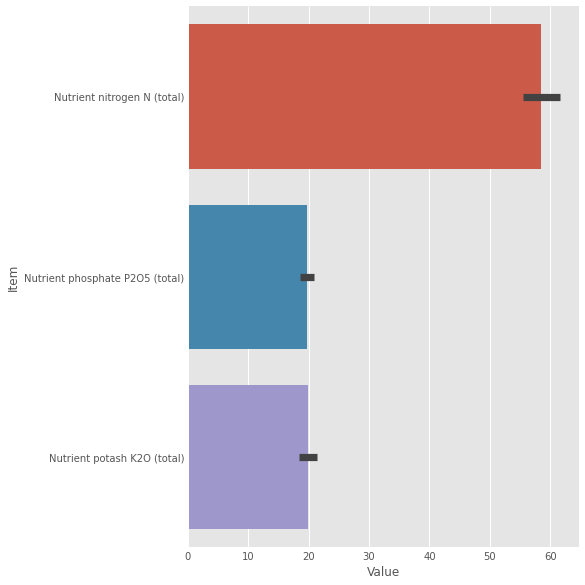

In [81]:
ax = sns.catplot(x='Value',y='Item',data = fertilizer,kind="bar",height = 8,aspect=1)

### Pesticides

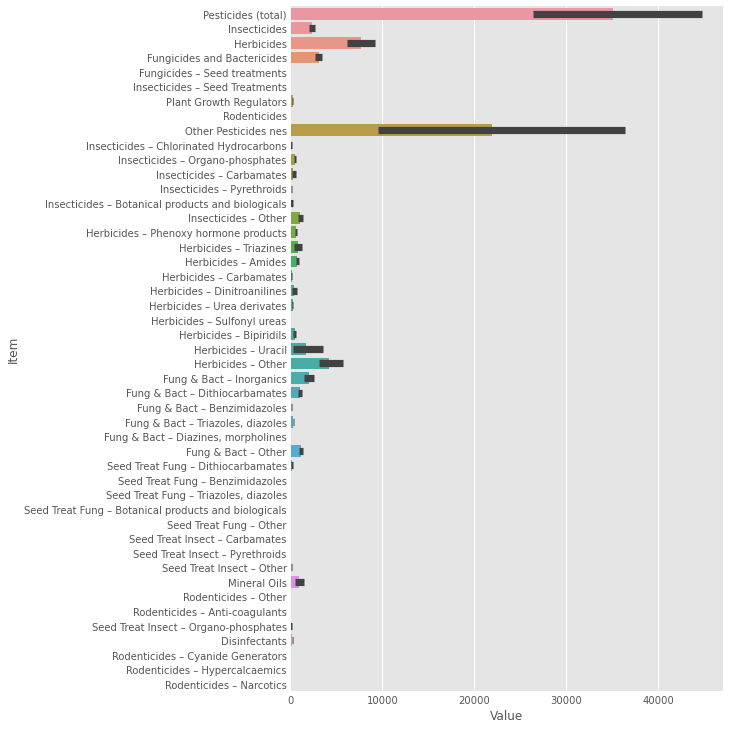

In [82]:
ax = sns.catplot(x='Value',y='Item',data = pesticides,kind="bar",height = 10,aspect=1)

### Crops

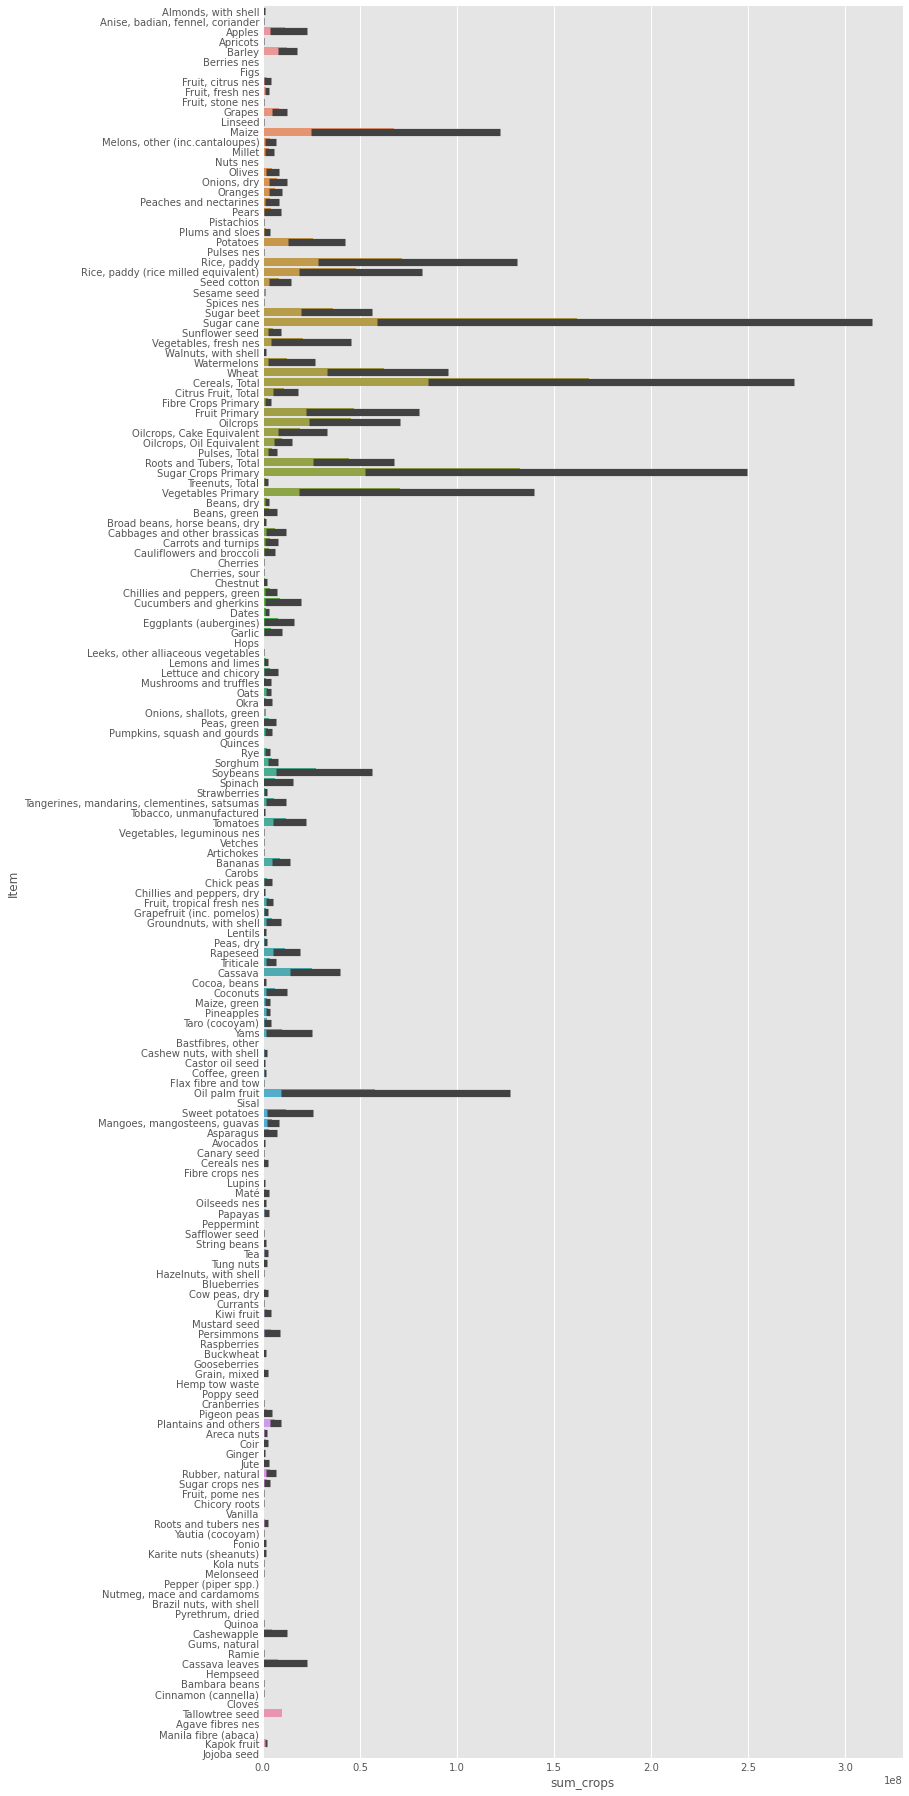

In [83]:
ax = sns.catplot(x='sum_crops',y='Item',data = crops,kind="bar",height = 25,aspect=0.5)

# Question 1 
## What are the top 5 high demand food by referring to food balance datasets?

In [84]:
food_balance['Item'].unique()

array(['Wheat and products', 'Rice and products', 'Barley and products',
       'Maize and products', 'Millet and products', 'Cereals, Other',
       'Potatoes and products', 'Sugar (Raw Equivalent)',
       'Sweeteners, Other', 'Honey', 'Pulses, Other and products',
       'Nuts and products', 'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine Meat', 'Mutton & Goat Meat',
       'Poult

In [85]:
food_balance.iloc[food_balance['Value'].argsort()[-3:]]

,Area,Element,Item,Year,Value
13153,China,Food,"Vegetables, Other",2017,450576.0
14491,"China, mainland",Food,"Vegetables, Other",2018,451702.0
13154,China,Food,"Vegetables, Other",2018,455116.0


In [86]:
highest_demand_crops = food_balance.groupby('Item')['Value'].agg('sum').nlargest(5)
highest_demand_crops

Item
Vegetables, Other          11769967.0
Milk - Excluding Butter     6272191.0
Rice and products           6125966.0
Wheat and products          5568366.0
Potatoes and products       2965840.0
Name: Value, dtype: float64

### Then, we take the top 3 high demand crops for further analysis.

# Question 2 What are the total, average and median of selected crops productions?

In [87]:
crops.head()

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,410202.0
5,Afghanistan,"Anise, badian, fennel, coriander",tonnes,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18040.0,19180.0,18143.0,153579.0
8,Afghanistan,Apples,tonnes,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0,217192.0,1055484.0
11,Afghanistan,Apricots,tonnes,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0,18510.0,713961.0
14,Afghanistan,Barley,tonnes,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0,56781.0,3624532.0


In [88]:
#to know what kind of crops appeared in datasets
crops['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Figs',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Fruit, stone nes',
       'Grapes', 'Linseed', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Millet', 'Nuts nes', 'Olives', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Pistachios', 'Plums and sloes',
       'Potatoes', 'Pulses nes', 'Rice, paddy',
       'Rice, paddy (rice milled equivalent)', 'Seed cotton',
       'Sesame seed', 'Spices nes', 'Sugar beet', 'Sugar cane',
       'Sunflower seed', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Cereals, Total', 'Citrus Fruit, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary', 'Beans, dry',
       'Beans,

In [89]:
#total
total_of_vege = crops.loc[crops['Item']=='Vegetables Primary', 'sum_crops'].sum()
print("total of vegetables is ", total_of_vege)
#average
num_of_vege_apperance = len(crops.loc[crops['Item']=='Vegetables Primary'])
print("number of appearance of vegetables : ",num_of_vege_apperance)
print("average of vegetables is ", total_of_vege/num_of_vege_apperance)
#median
median_of_vege = crops.loc[crops['Item']=='Vegetables Primary', 'sum_crops'].median()
print("median of vegetables is ", median_of_vege)

total of vegetables is  15143590896.0
number of appearance of vegetables :  215
average of vegetables is  70435306.49302326
median of vegetables is  3457186.0


In [90]:
#total
total_of_rice = crops.loc[crops['Item']=='Rice, paddy', 'sum_crops'].sum()
print("total of Rice, paddy is ", total_of_rice)
#average
num_of_rice_apperance = len(crops.loc[crops['Item']=='Rice, paddy'])
print("number of appearance of Rice, paddy : ",num_of_rice_apperance)
print("average of Rice, paddy is ", total_of_rice/num_of_rice_apperance)
#median
median_of_rice = crops.loc[crops['Item']=='Rice, paddy', 'sum_crops'].median()
print("median of Rice, paddy is ", median_of_rice)

total of Rice, paddy is  9455199344.0
number of appearance of Rice, paddy :  132
average of Rice, paddy is  71630298.06060606
median of Rice, paddy is  1887581.0


In [91]:
#total
total_of_Wheat = crops.loc[crops['Item']=='Wheat', 'sum_crops'].sum()
print("total of Wheat is ", total_of_Wheat)
#average
num_of_Wheat_apperance = len(crops.loc[crops['Item']=='Wheat'])
print("number of appearance of Wheat : ",num_of_Wheat_apperance)
print("average of Wheat is ", total_of_Wheat/num_of_Wheat_apperance)
#median
median_of_Wheat = crops.loc[crops['Item']=='Wheat', 'sum_crops'].median()
print("median of Wheat is ", median_of_Wheat)

total of Wheat is  8380356215.0
number of appearance of Wheat :  134
average of Wheat is  62539971.75373134
median of Wheat is  3087631.0


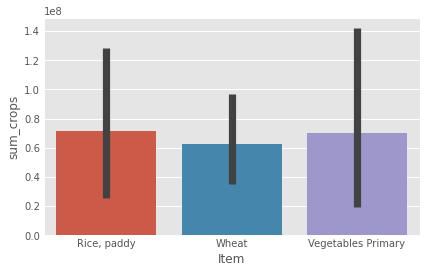

In [92]:
vrw = crops[(crops['Item']=='Vegetables Primary')|(crops['Item']=='Rice, paddy')|(crops['Item']=='Wheat')]
v = crops[(crops['Item']=='Vegetables Primary') ]
v = v[['Item','sum_crops']]
r = crops[(crops['Item']=='Rice, paddy') ]
r = r[['Item','sum_crops']]
w= crops[(crops['Item']=='Wheat')]
w = w[['Item','sum_crops']]
#ax = sns.boxplot(x="Item", y="sum_crops", data=vrw)
#v.plot(kind='box')
#ax = sns.boxplot(orient="h", data=vege)
ax = sns.barplot(x="Item", y="sum_crops", data=vrw)

# Question 3 What are the countries with crop production of each type of selected crops lower than the median?

In [93]:
vege = crops.loc[(crops['Item']=='Vegetables Primary') & (crops['sum_crops']<median_of_vege),'Area']
print(vege.unique())
print(len(vege),"out of total countries lower than median")

['American Samoa' 'Antigua and Barbuda' 'Bahamas' 'Bahrain' 'Barbados'
 'Belgium-Luxembourg' 'Belize' 'Bermuda' 'Bhutan' 'Botswana'
 'Brunei Darussalam' 'Burkina Faso' 'Cabo Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Cyprus'
 'Czechia' 'Czechoslovakia' 'Denmark' 'Djibouti' 'Dominica' 'El Salvador'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia PDR' 'Fiji' 'Finland'
 'French Guyana' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Grenada'
 'Guadeloupe' 'Guam' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Iceland' 'Ireland'
 'Jamaica' 'Kiribati' 'Kuwait' 'Latvia' 'Lesotho' 'Liberia' 'Lithuania'
 'Luxembourg' 'Maldives' 'Malta' 'Martinique' 'Mauritania' 'Mauritius'
 'Micronesia (Federated States of)' 'Mongolia' 'Montenegro' 'Montserrat'
 'Namibia' 'Nauru' 'New Caledonia' 'Nicaragua' 'Niue' 'Norway' 'Oman'
 'Pacific Islands Trust Territory' 'Panama' 'Paraguay' 'Puerto Rico'
 'Qatar' 'Republic of Moldova

In [94]:
rice = crops.loc[(crops['Item']=='Rice, paddy') & (crops['sum_crops']<median_of_rice),'Area']
print(rice.unique())
print(len(rice),"out of total countries lower than median")

['Albania' 'Algeria' 'Angola' 'Armenia' 'Azerbaijan' 'Belize' 'Bhutan'
 'Brunei Darussalam' 'Bulgaria' 'Burundi' 'Central African Republic'
 'Chile' 'China, Hong Kong SAR' 'Comoros' 'Congo' 'El Salvador' 'Eswatini'
 'Ethiopia' 'Fiji' 'France' 'French Guyana' 'Gabon' 'Gambia' 'Guatemala'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hungary' 'Jamaica' 'Kenya'
 'Kyrgyzstan' 'Malawi' 'Mauritius' 'Micronesia (Federated States of)'
 'Morocco' 'Mozambique' 'New Zealand' 'Niger' 'North Macedonia'
 'Pacific Islands Trust Territory' 'Papua New Guinea' 'Portugal'
 'Puerto Rico' 'Republic of Moldova' 'Réunion' 'Romania' 'Rwanda'
 'Saint Vincent and the Grenadines' 'Saudi Arabia' 'Solomon Islands'
 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Sudan (former)'
 'Syrian Arab Republic' 'Tajikistan' 'Timor-Leste' 'Togo'
 'Trinidad and Tobago' 'Turkmenistan' 'Ukraine' 'USSR' 'Yugoslav SFR'
 'Zambia' 'Zimbabwe']
66 out of total countries lower than median


In [95]:
wheat = crops.loc[(crops['Item']=='Wheat') & (crops['sum_crops']<median_of_Wheat),'Area']
print(wheat.unique())
print(len(wheat),"out of total countries lower than median")

['Albania' 'Angola' 'Armenia' 'Belgium-Luxembourg' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Burundi' 'Cameroon' 'Chad' 'China, Taiwan Province of' 'Colombia'
 'Cyprus' 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Ecuador' 'Eritrea' 'Eswatini'
 'Ethiopia PDR' 'Georgia' 'Guatemala' 'Honduras' 'Israel' 'Jordan' 'Kenya'
 'Kuwait' 'Lebanon' 'Lesotho' 'Libya' 'Luxembourg' 'Madagascar' 'Malawi'
 'Mali' 'Malta' 'Mauritania' 'Montenegro' 'Mozambique' 'Myanmar' 'Namibia'
 'New Caledonia' 'Niger' 'Nigeria' 'North Macedonia' 'Oman' 'Palestine'
 'Peru' 'Portugal' 'Qatar' 'Republic of Korea' 'Rwanda'
 'Serbia and Montenegro' 'Slovenia' 'Somalia' 'South Sudan'
 'Sudan (former)' 'Thailand' 'Uganda' 'United Arab Emirates'
 'United Republic of Tanzania' 'USSR' 'Venezuela (Bolivarian Republic of)'
 'Yemen' 'Yugoslav SFR' 'Zambia' 'Zimbabwe']
67 out of total countries lower than median


In [96]:
def intersection(lst1, lst2,lst3): 
    return list(set(lst1) & set(lst2) & set(lst3))

##print out countries that having three high demand crops lower than median
print(intersection(vege,rice,wheat)) 

['Zimbabwe', 'Bhutan', 'USSR', 'Somalia', 'Yugoslav SFR', 'Eswatini', 'South Sudan']


# Question 4 What are the top 5 countries that harvest the most of the selected crops in the world?

In [97]:
country_vege = crops[crops['Item']=='Vegetables Primary'].groupby('Area')['sum_crops'].sum()
cv = country_vege.nlargest(5)

In [98]:
country_rice = crops[crops['Item']=='Rice, paddy'].groupby('Area')['sum_crops'].sum()
cr = country_rice.nlargest(5)

In [99]:
country_wheat = crops[crops['Item']=='Wheat'].groupby('Area')['sum_crops'].sum()
cw = country_wheat.nlargest(5)

In [100]:
print(cv)
print(cr)
print(cw)
#intersection
print("The countries which harvest the most of the three crops are: China, China, mainland, and India.")
print("We will use these three countries in questions 6 and 7.")

Area
China                       5.045430e+09
China, mainland             5.021424e+09
India                       1.151035e+09
United States of America    3.423307e+08
Turkey                      2.286233e+08
Name: sum_crops, dtype: float64
Area
China              2.070852e+09
China, mainland    2.054261e+09
India              1.573056e+09
Indonesia          7.267457e+08
Bangladesh         5.154934e+08
Name: sum_crops, dtype: float64
Area
China                       1.248603e+09
China, mainland             1.248548e+09
India                       9.096270e+08
Russian Federation          6.022793e+08
United States of America    5.671135e+08
Name: sum_crops, dtype: float64
The countries which harvest the most of the three crops are: China, China, mainland, and India.
We will use these three countries in questions 6 and 7.


# 5. i. What types of crops are planted in each climate zone? 

In [101]:
climate.head()

,Country,Climate Zone,Description
0,Afghanistan,arid to semiarid,cold winters and hot summers
1,Akrotiri,temperate,"Mediterranean with hot, dry summers and cool w..."
2,Albania,mild temperate,"cool, cloudy, wet winters; hot, clear, dry sum..."
3,Algeria,arid to semiarid,"mild, wet winters with hot, dry summers along ..."
4,American Samoa,tropical marine,moderated by southeast trade winds; annual rai...


In [102]:
#climate['Country']==crops['Area']
#extract Area and Item from crops
#merge with climate
crops_sub = crops[['Area','Item']]
crops_sub.columns=['Country','Item']

In [103]:
result= pd.merge(climate,crops_sub,how="inner",on=['Country'])
result

,Country,Climate Zone,Description,Item
0,Afghanistan,arid to semiarid,cold winters and hot summers,"Almonds, with shell"
1,Afghanistan,arid to semiarid,cold winters and hot summers,"Anise, badian, fennel, coriander"
2,Afghanistan,arid to semiarid,cold winters and hot summers,Apples
3,Afghanistan,arid to semiarid,cold winters and hot summers,Apricots
4,Afghanistan,arid to semiarid,cold winters and hot summers,Barley
...,...,...,...,...
10033,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,"Pulses, Total"
10034,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,"Roots and Tubers, Total"
10035,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,Sugar Crops Primary
10036,Zimbabwe,tropical,moderated by altitude; rainy season (November ...,"Treenuts, Total"


In [104]:
df = result.groupby(by='Climate Zone',as_index=True)['Item']
df = pd.DataFrame(df,columns=['Climate Zone','Item'])
df

,Climate Zone,Item
0,Mediterranean,"5457 Almonds, with shell 5458 ..."
1,Mediterranean,"1149 Almonds, with shell 1150 ..."
2,Mediterranean and continental,"2278 Almonds, with shell 2279 ..."
3,Mediterranean climate on the coast,"8278 Almonds, with shell 8279 ..."
4,"Mediterranean climate,",6282 ...
...,...,...
61,varies from temperate,"1658 Anise, badian, fennel, coriander 1659 ..."
62,varies from tropical in east to dry desert in ...,"7140 Almonds, with shell 7141 ..."
63,varies with terrain,1577 Apricots 1578 ...
64,warm and pleasant,"3454 Almonds, with shell 3455 ..."


# ii. Which climate zones are suitable for the selected crops?

In [105]:
#vegetables

df2 = result[result['Item']=='Vegetables Primary'].groupby('Climate Zone')['Item']
df2 = pd.DataFrame(df2,columns=['Climate Zone','Item'])
df2['Climate Zone'].unique()

array(['Mediterranean', 'Mediterranean ', 'Mediterranean and continental',
       'Mediterranean climate on the coast', 'Mediterranean climate, ',
       'arid', 'arid continental', 'arid to semiarid', 'cold and wet',
       'cold temperate', 'cold winters', 'continental', 'desert', 'dry',
       'dry desert', 'equatorial', 'extremely diverse', 'harsh',
       'highland continental', 'hot and dry',
       'hot with seasonal rainfall ', 'in the north', 'maritime',
       'maritime temperate', 'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly arid desert', 'mostly desert',
       'mostly hot, dry desert', 'mostly semiarid',
       'predominantly Mediterranean', 'principally desert', 'semiarid',
       'sub-tropical', 'subtropical', 'subtropical ',
       'subtropical to arid', 'subtropical to temperate',
       'subtropical, temperate', 'temperate', 'temperate ',
       'temperate along coast', 'temperate and marine',
       'te

In [106]:
df3 = result[result['Item']=='Rice, paddy'].groupby('Climate Zone')['Item']
df3 = pd.DataFrame(df3,columns=['Climate Zone','Item'])
df3['Climate Zone'].unique()

array(['Mediterranean', 'arid continental', 'arid to semiarid',
       'continental', 'desert', 'dry', 'equatorial', 'extremely diverse',
       'harsh', 'highland continental', 'hot and dry',
       'hot with seasonal rainfall ', 'maritime temperate',
       'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly desert', 'mostly hot, dry desert',
       'mostly semiarid', 'predominantly Mediterranean',
       'principally desert', 'semiarid', 'sub-tropical',
       'subtropical to arid', 'subtropical to temperate',
       'subtropical, temperate', 'temperate', 'temperate continental',
       'tropical', 'tropical ', 'tropical and subtropical',
       'tropical in lowlands', 'tropical marine', 'tropical maritime',
       'tropical monsoon', 'tropical, temperate', 'varies',
       'varies from temperate',
       'varies from tropical in east to dry desert in west',
       'varies with terrain', 'warm temperate'], dtype=object)

In [107]:
df4 = result[result['Item']=='Wheat'].groupby('Climate Zone')['Item']
df4 = pd.DataFrame(df4,columns=['Climate Zone','Item'])
df4['Climate Zone'].unique()

array(['Mediterranean', 'Mediterranean ', 'Mediterranean and continental',
       'Mediterranean climate on the coast', 'Mediterranean climate, ',
       'arid', 'arid continental', 'arid to semiarid', 'cold temperate',
       'cold winters', 'continental', 'desert', 'dry', 'dry desert',
       'equatorial', 'extremely diverse', 'harsh', 'highland continental',
       'hot and dry', 'hot with seasonal rainfall ', 'in the north',
       'maritime', 'maritime temperate', 'metropolitan',
       'midlatitude continental, hot summers, mild winters',
       'mild temperate', 'mostly arid desert', 'mostly desert',
       'mostly hot, dry desert', 'mostly semiarid',
       'predominantly Mediterranean', 'principally desert', 'semiarid',
       'sub-tropical', 'subtropical to arid', 'subtropical to temperate',
       'subtropical, temperate', 'temperate', 'temperate ',
       'temperate along coast', 'temperate and marine',
       'temperate continental', 'temperate maritime',
       'temperate

In [108]:
print(intersection(df2['Climate Zone'],df3['Climate Zone'],df['Climate Zone'])) 
## These climate is suitable for planting high demand crops (vegetables, rice and paddy, wheat)

['highland continental', 'tropical in lowlands', 'tropical ', 'sub-tropical', 'predominantly Mediterranean', 'subtropical to arid', 'equatorial', 'dry', 'hot with seasonal rainfall ', 'semiarid', 'arid to semiarid', 'principally desert', 'tropical maritime', 'arid continental', 'warm temperate', 'continental', 'subtropical, temperate', 'mild temperate', 'tropical monsoon', 'metropolitan', 'extremely diverse', 'varies with terrain', 'harsh', 'temperate continental', 'varies from tropical in east to dry desert in west', 'desert', 'midlatitude continental, hot summers, mild winters', 'temperate', 'hot and dry', 'mostly semiarid', 'varies', 'mostly desert', 'mostly hot, dry desert', 'tropical, temperate', 'varies from temperate', 'Mediterranean', 'subtropical to temperate', 'tropical and subtropical', 'tropical marine', 'maritime temperate', 'tropical']


## Question 6 i. What are the total, average and median of fertilizers usage of selected countries?

In [109]:
fer = fertilizer.loc[(fertilizer['Area']=='China') | (fertilizer['Area']=='China, mainland') | (fertilizer['Area']=='India')]
fer_c = fer.loc[(fer['Area']=='China')]
fer_cm = fer.loc[(fer['Area']=='China, mainland')]
fer_i = fer.loc[(fer['Area']=='India')]
print("For China used fertilizers")
print("sum: ",fer_c['Value'].sum())
print("mean: ",fer_c['Value'].mean())
print("median: ",fer_c['Value'].median())
print("For China, mainland used fertilizers")
print("sum: ",fer_cm['Value'].sum())
print("mean: ",fer_cm['Value'].mean())
print("median: ",fer_cm['Value'].median())
print("For India used fertilizers")
print("sum: ",fer_i['Value'].sum())
print("mean: ",fer_i['Value'].mean())
print("median: ",fer_i['Value'].median())

For China used fertilizers
sum:  3851.4200000000005
mean:  128.38066666666666
median:  100.3
For China, mainland used fertilizers
sum:  3844.06
mean:  128.13533333333334
median:  99.95
For India used fertilizers
sum:  1565.3200000000004
mean:  52.17733333333335
median:  40.795


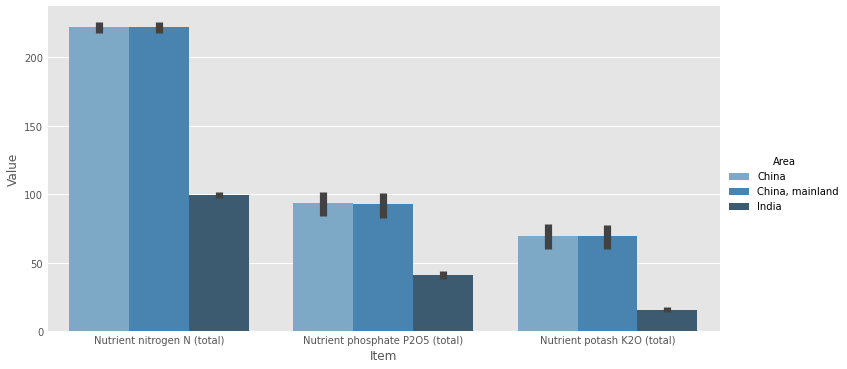

In [110]:
ax = sns.catplot(x="Item", y="Value", data=fer,kind="bar",palette="Blues_d",hue = "Area",height = 5,aspect =2)

## ii. What is the relationship between fertilizers usage and total of each type of crops production?

In [111]:
fertilizer['Value']
crops_area_sum['sum_crops'] = crops[filter_column].sum(axis=1)
crops_area_sum = crops_area_sum[['Area Code','sum_crops']]
merged_fertilizer= pd.merge(fertilizer,crops_area_sum,how="inner",on=['Area Code'])
merged_fertilizer=merged_fertilizer.groupby('Area Code').mean()
merged_fertilizer = merged_fertilizer[['Value','sum_crops']]
merged_fertilizer = scaler.fit_transform(merged_fertilizer)
merged_fertilizer = pd.DataFrame(merged_fertilizer,columns=['Value','sum_crops'])
merged_fertilizer

,Value,sum_crops
0,0.260468,0.003482
1,0.013582,0.014463
2,0.163964,0.002589
3,0.034998,0.022093
4,0.016107,0.035752
...,...,...
153,0.587037,0.018313
154,0.481250,0.000364
155,0.255230,0.018852
156,0.011589,0.020247


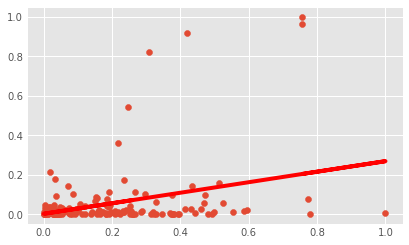

In [112]:
plt.scatter(merged_fertilizer['Value'],merged_fertilizer['sum_crops'])
m,b = np.polyfit(merged_fertilizer['Value'],merged_fertilizer['sum_crops'],1)
plt.plot(merged_fertilizer['Value'],m*merged_fertilizer['Value']+b,color='r')
plt.show()
## Conclusion
##smaller usage of fertilizer will better

In [113]:
df_corr = merged_fertilizer[['Value','sum_crops']]
df_corr.corr()

,Value,sum_crops
Value,1.000000,0.327878
sum_crops,0.327878,1.000000


<AxesSubplot:>

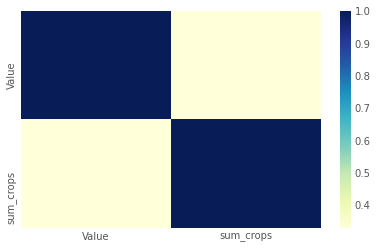

In [114]:
sns.heatmap(df_corr.corr(),cmap="YlGnBu")

## Question 7 i. What are the total, average and median of pesticides usage of selected countries?


In [115]:
pest = pesticides.loc[(pesticides['Area']=='China') | (pesticides['Area']=='China, mainland') | (pesticides['Area']=='India')]
pest_c = pest.loc[(pest['Area']=='China')]
pest_cm = pest.loc[(pest['Area']=='China, mainland')]
pest_i = pest.loc[(pest['Area']=='India')]
print("For China used pesticides")
print("sum: ",pest_c['Value'].sum())
print("mean: ",pest_c['Value'].mean())
print("median: ",pest_c['Value'].median())
print("For China, mainland used pesticides")
print("sum: ",pest_cm['Value'].sum())
print("mean: ",pest_cm['Value'].mean())
print("median: ",pest_cm['Value'].median())
print("For India used pesticides")
print("sum: ",pest_i['Value'].sum())
print("mean: ",pest_i['Value'].mean())
print("median: ",pest_i['Value'].median())
pest.dropna(inplace=True)
pest = pest[(pest[['Value']] != 0).all(axis=1)]
#pest

For China used pesticides
sum:  17814021
mean:  1781402.1
median:  1773684.0
For China, mainland used pesticides
sum:  35441728
mean:  1772086.4
median:  1763000.0
For India used pesticides
sum:  958870
mean:  8878.425925925925
median:  881.0


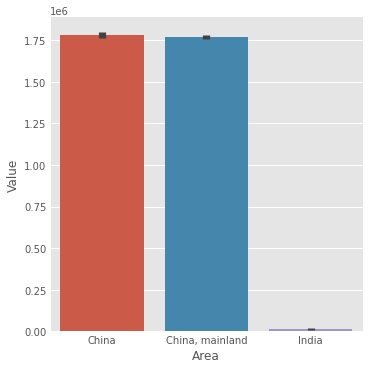

In [116]:
ax = sns.catplot(x="Area", y="Value", data=pest,kind="bar",height = 5,aspect =1)

## ii. What is the relationship between pesticides usage and total of each type of crops production of selected countries?

In [117]:
merged_pest= pd.merge(pesticides,crops_area_sum,how="inner",on=['Area Code'])
merged_pest = merged_pest.groupby('Area Code').mean()
merged_pest = merged_pest[['Value','sum_crops']]
merged_pest = scaler.fit_transform(merged_pest)
merged_pest = pd.DataFrame(merged_pest,columns=['Value','sum_crops'])
merged_pest

,Value,sum_crops
0,0.000040,0.003503
1,0.000063,0.002610
2,0.001083,0.022114
3,0.000009,0.035773
4,0.000002,0.000031
...,...,...
164,0.000012,0.000385
165,0.000021,0.000236
166,0.000263,0.020268
167,0.000303,0.000919


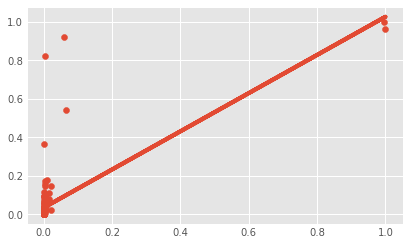

In [118]:
plt.scatter(merged_pest['Value'],merged_pest['sum_crops'])
m,b = np.polyfit(merged_pest['Value'],merged_pest['sum_crops'],1)
plt.plot(merged_pest['Value'],m*merged_pest['Value']+b)
plt.show()

##find correlation value(?)
## plot along heatmap to fulfill data visualization part

In [119]:
df_corr2 = merged_pest[['Value','sum_crops']]
df_corr2.corr()

,Value,sum_crops
Value,1.000000,0.717698
sum_crops,0.717698,1.000000


<AxesSubplot:>

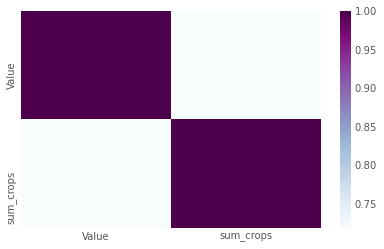

In [120]:
sns.heatmap(df_corr2.corr(),cmap="BuPu")

## By focusing on Vegetables, Rice, Paddy and Wheat for the top 5 countries harvested them:

## Question 8 

## i. By observing trend, is the crop production enough for food consumption from year 2009 to year 2018?

In [121]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [127]:
#crops_filtered = crops[crops['Item' == vege, rice and wheat]] [top 5 countries]
list_item = ['Vegetables Primary', 'Rice, paddy','Wheat'] 
#crops['Item'] = crops['Item'].apply(lambda s:s.astype(str))
#crops['Area'] = crops['Item'].apply(lambda s:s.astype(str))
#crops_filtered = np.logical_and(crops['Item']=='Vegetables Primary',crops['Area'] == 'China')
crops_filtered = crops[(crops['Item']=='Vegetables Primary') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'United States of America')|(crops['Area'] == 'Turkey')) & (crops['Unit']=="tonnes")]
crops_filtered2 = crops[(crops['Item']=='Rice, paddy') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'Indonesia')|(crops['Area'] == 'Bangladesh')) & (crops['Unit']=="tonnes")]
crops_filtered3 = crops[(crops['Item']=='Wheat') & ((crops['Area'] == 'China') | (crops['Area'] == 'China, mainland') | (crops['Area'] == 'India')|(crops['Area'] == 'United States of America')|(crops['Area'] == 'Russian Federation')) & (crops['Unit']=="tonnes")]
pdList=[crops_filtered,crops_filtered2,crops_filtered3]
new_crops_filtered= pd.concat(pdList)
new_crops_filtered.drop('sum_crops',axis=1,inplace=True)
new_crops_filtered.drop('Area',axis=1,inplace=True)
#new_crops_filtered.drop('Item',axis=1,inplace=True)
new_crops_filtered.drop('Unit',axis=1,inplace=True)
new_crops_filtered

,Item,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
6756,Vegetables Primary,445449901.0,459774772.0,477851683.0,486181756.0,495795698.0,506738466.0,533325320.0,542998948.0,545756704.0,551556530.0
7236,Vegetables Primary,443146776.0,457435300.0,475378572.0,483885365.0,493421702.0,504291171.0,531015770.0,540610759.0,543245774.0,548993011.0
15969,Vegetables Primary,90176120.0,99349826.0,105711720.0,112932800.0,119592200.0,125142701.0,118394582.0,123118917.0,128373327.0,128243182.0
34345,Vegetables Primary,21234448.0,20655850.0,21978709.0,22043387.0,22794099.0,22684068.0,23696207.0,24421408.0,24977476.0,24137627.0
35746,Vegetables Primary,36639165.0,34723852.0,33970839.0,35260078.0,33637343.0,35661041.0,34473798.0,34137921.0,32085784.0,31740872.0
2418,"Rice, paddy",48144000.0,50061200.0,50627000.0,50497000.0,51534000.0,51806593.0,51805464.0,50452866.0,54148000.0,56417319.0
6625,"Rice, paddy",196681177.0,197212003.0,202667169.0,205936129.0,205201696.0,208239610.0,213723732.0,212681776.0,214430049.0,214078796.0
7108,"Rice, paddy",195103008.0,195760992.0,201000896.0,204235900.0,203612192.0,206507400.0,212142000.0,211094000.0,212676000.0,212129000.0
15880,"Rice, paddy",135672992.0,143963008.0,157900000.0,157800000.0,159200000.0,157200000.0,156540000.0,163700000.0,168500000.0,172580000.0
16105,"Rice, paddy",64398888.0,66469392.0,65756904.0,69056128.0,71279712.0,70846465.0,75397841.0,79354767.0,81148594.0,83037000.0


In [129]:
index = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
#vegetables
#crops
vp= new_crops_filtered.loc[new_crops_filtered['Item'] == 'Vegetables Primary']
vp = vp.mean()
vp = pd.DataFrame(vp,columns=['Values'])
vp_scaled = scaler.fit_transform(vp)
vp_scaled = pd.DataFrame(vp_scaled,columns=['Values'],index=index)
#vp_scaled

#food balance
vg = food_balance.loc[(food_balance['Item'] == 'Vegetables, Other') & (food_balance['Area']== 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'United States of America')|(food_balance['Area'] == 'Turkey')]
vg = vg[['Year','Value']]
vg = vg.groupby(['Year']).mean()
vg_scaled = scaler.fit_transform(vg)
vg_scaled = pd.DataFrame(vg_scaled,columns=['Value'],index = index)
#vg_scaled

In [123]:
#rice and paddy
#crops
rp = new_crops_filtered.loc[new_crops_filtered['Item'] == 'Rice, paddy']
rp=rp.mean()
rp=pd.DataFrame(rp,columns=['Values'])
rp_scaled = scaler.fit_transform(rp)
rp_scaled=pd.DataFrame(rp_scaled,columns=['Values'],index=index)
#rp_scaled

#food balance
rpp = food_balance.loc[(food_balance['Item'] == 'Rice and products') & ((food_balance['Area'] == 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'Indonesia')|(food_balance['Area'] == 'Bangladesh')) ]
rpp = rpp[['Year','Value']]
rpp = rpp.groupby(['Year']).mean()
rpp_scaled = scaler.fit_transform(rpp)
rpp_scaled = pd.DataFrame(rpp_scaled,columns=['Value'],index=index)
#rpp_scaled

In [125]:
#wheat
#crops
wh= new_crops_filtered.loc[new_crops_filtered['Item'] == 'Wheat']
wh = wh.mean()
wh = pd.DataFrame(wh,columns=['Values'])
wh_scaled = scaler.fit_transform(wh)
wh_scaled = pd.DataFrame(wh_scaled,columns=['Values'],index=index)
#wh_scaled

#food balance
whp = food_balance.loc[(food_balance['Item'] == 'Wheat and products') & ((food_balance['Area'] == 'China') | (food_balance['Area'] == 'China, mainland') | (food_balance['Area'] == 'India')|(food_balance['Area'] == 'United States of America')|(food_balance['Area'] == 'Russian Federation')) ]
whp = whp[['Year','Value']]
whp = whp.groupby(['Year']).mean()
whp_scaled = scaler.fit_transform(whp)
whp_scaled = pd.DataFrame(whp_scaled,columns=['Value'],index = index)
#whp_scaled

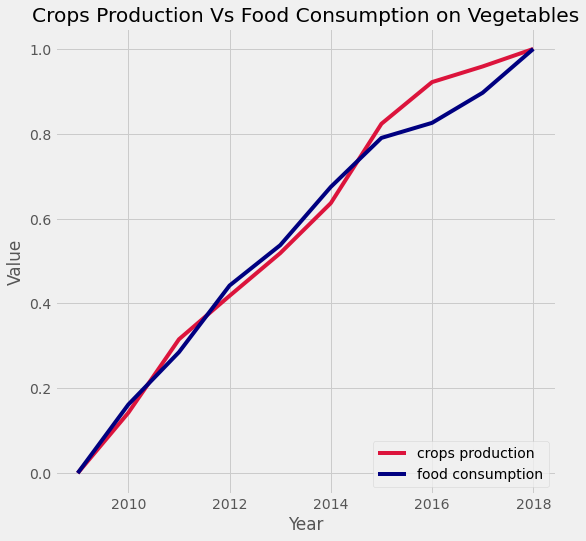

In [64]:
plt.figure(figsize=(8,8))
#vegetables
plt.title("Crops Production Vs Food Consumption on Vegetables")
plt.xlabel("Year")
plt.ylabel("Value")
plt.plot(vp_scaled,c='crimson',label = 'crops production')
plt.plot(vg_scaled,c='navy',label = 'food consumption')
plt.legend(['crops production','food consumption'],loc="lower right") 
plt.show()

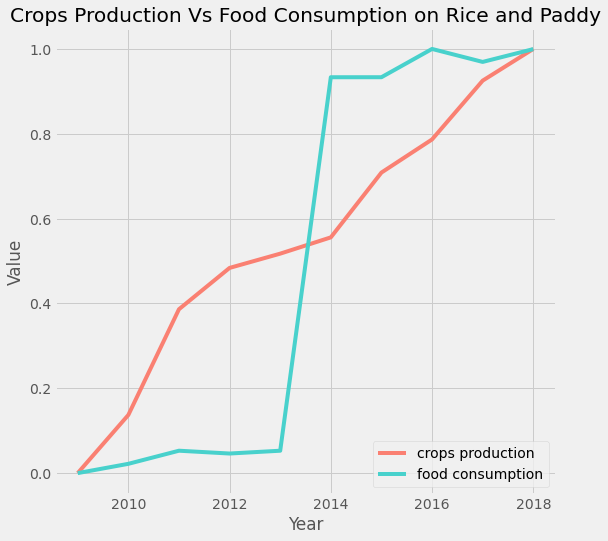

In [65]:
#rice and products
plt.figure(figsize=(8,8))
plt.title("Crops Production Vs Food Consumption on Rice and Paddy")
plt.xlabel("Year")
plt.ylabel("Value")
plt.plot(rp_scaled,c='salmon',label = 'crops production')
plt.plot(rpp_scaled,c='mediumturquoise',label = 'food consumption')
plt.legend(['crops production','food consumption'],loc="lower right") 

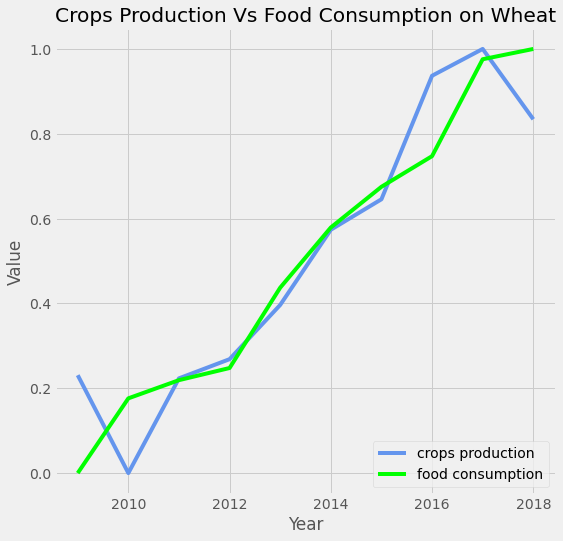

In [66]:
#wheat and products
plt.figure(figsize=(8,8))
plt.title("Crops Production Vs Food Consumption on Wheat")
plt.xlabel("Year")
plt.ylabel("Value")
plt.plot(wh_scaled,c='cornflowerblue',label = 'crops production')
plt.plot(whp_scaled,c='lime',label = 'food consumption')
plt.legend(['crops production','food consumption'],loc="lower right") 

## ii. What clusters of countries can be found with refer to the food supply sufficiency? 

In [67]:
#should use crops production and foood consumption(food balance) as x & y axis
#for the kmeans, countries are the same key of both factors

In [68]:
crop = crop[:37790]
crops=crop[['Area','Item','Unit','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018']]
crops_area_sum = crop.fillna(0)
crop

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,0.0,0.0,0.0,...,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,0.0,0.0,0.0,...,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,0.0,0.0,0.0,...,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,0.0,0.0,0.0,...,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,0.0,0.0,0.0,...,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,181,Zimbabwe,1729,"Treenuts, Total",5419,Yield,hg/ha,0.0,0.0,0.0,...,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0
37786,181,Zimbabwe,1729,"Treenuts, Total",5510,Production,tonnes,0.0,0.0,0.0,...,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0
37787,181,Zimbabwe,1735,Vegetables Primary,5312,Area harvested,ha,12296.0,12644.0,12794.0,...,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0
37788,181,Zimbabwe,1735,Vegetables Primary,5419,Yield,hg/ha,65324.0,65900.0,65963.0,...,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0


In [69]:
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,Afghanistan,"Almonds, with shell",ha,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,Afghanistan,"Almonds, with shell",hg/ha,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,Afghanistan,"Anise, badian, fennel, coriander",ha,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,Afghanistan,"Anise, badian, fennel, coriander",hg/ha,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,Zimbabwe,"Treenuts, Total",hg/ha,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0
37786,Zimbabwe,"Treenuts, Total",tonnes,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0
37787,Zimbabwe,Vegetables Primary,ha,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0
37788,Zimbabwe,Vegetables Primary,hg/ha,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0


In [70]:
crops = crops.fillna(0)

In [71]:
filter_column = list(crops)
filter_column.remove('Area')
filter_column.remove('Item')
filter_column.remove('Unit')

In [72]:
crops['sum_crops'] = crops[filter_column].sum(axis=1)

In [73]:
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
0,Afghanistan,"Almonds, with shell",ha,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,151018.0
1,Afghanistan,"Almonds, with shell",hg/ha,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,294304.0
2,Afghanistan,"Almonds, with shell",tonnes,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,410202.0
3,Afghanistan,"Anise, badian, fennel, coriander",ha,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0,225253.0
4,Afghanistan,"Anise, badian, fennel, coriander",hg/ha,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0,67525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,Zimbabwe,"Treenuts, Total",hg/ha,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0,154733.0
37786,Zimbabwe,"Treenuts, Total",tonnes,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0,55996.0
37787,Zimbabwe,Vegetables Primary,ha,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0,318419.0
37788,Zimbabwe,Vegetables Primary,hg/ha,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0,722469.0


In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
area_cat = crops["Area"].values
area_cat_encoded = encoder.fit_transform(area_cat.astype('str'))   # this "fits" the labels to numerical classes
area_cat_encoded

array([  0,   0,   0, ..., 223, 223, 223], dtype=int64)

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
unit_cat = crops["Unit"].values
unit_cat_encoded = encoder.fit_transform(unit_cat.astype('str'))   # this "fits" the labels to numerical classes
unit_cat_encoded

array([0, 1, 2, ..., 0, 1, 2], dtype=int64)

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
item_cat = crops["Item"].values
item_cat_encoded = encoder.fit_transform(item_cat.astype('str'))   # this "fits" the labels to numerical classes
item_cat_encoded

array([  1,   1,   1, ..., 166, 166, 166], dtype=int64)

In [77]:
crops['Unit'] = encoder.fit_transform(crops['Unit'])
crops['Area'] = encoder.fit_transform(crops['Area'])
crops['Item'] = encoder.fit_transform(crops['Item'])
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops
0,0,1,0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,151018.0
1,0,1,1,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,294304.0
2,0,1,2,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,410202.0
3,0,2,0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0,225253.0
4,0,2,1,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0,67525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,223,162,1,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0,154733.0
37786,223,162,2,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0,55996.0
37787,223,166,0,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0,318419.0
37788,223,166,1,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0,722469.0


In [78]:
sum_cropsminmax = crops[['sum_crops']]
minmaxcrops = scaler.fit_transform(sum_cropsminmax)
cropsch = pd.DataFrame(minmaxcrops, columns = ['sum_crops'])
cropsch

,sum_crops
0,0.000020
1,0.000040
2,0.000055
3,0.000030
4,0.000009
...,...
37785,0.000021
37786,0.000008
37787,0.000043
37788,0.000098


In [79]:
crops['newsum'] = cropsch
crops

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,sum_crops,newsum
0,0,1,0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,151018.0,0.000020
1,0,1,1,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,294304.0,0.000040
2,0,1,2,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,410202.0,0.000055
3,0,2,0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0,225253.0,0.000030
4,0,2,1,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0,67525.0,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,223,162,1,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0,154733.0,0.000021
37786,223,162,2,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0,55996.0,0.000008
37787,223,166,0,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0,318419.0,0.000043
37788,223,166,1,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0,722469.0,0.000098


In [80]:
cropsnew1 = crops.drop(columns=['sum_crops'])
cropsnew1

,Area,Item,Unit,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,newsum
0,0,1,0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,0.000020
1,0,1,1,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,0.000040
2,0,1,2,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,0.000055
3,0,2,0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0,0.000030
4,0,2,1,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,223,162,1,12282.0,12727.0,12688.0,15200.0,17700.0,15254.0,16099.0,17000.0,17598.0,18185.0,0.000021
37786,223,162,2,3070.0,4073.0,5075.0,6080.0,7080.0,4884.0,6418.0,6531.0,6348.0,6437.0,0.000008
37787,223,166,0,29519.0,31281.0,31318.0,30547.0,30547.0,31582.0,32636.0,33224.0,33683.0,34082.0,0.000043
37788,223,166,1,71327.0,70523.0,66161.0,75405.0,75405.0,73753.0,72439.0,72350.0,72445.0,72661.0,0.000098


In [81]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
X = ss.fit_transform(cropsnew1)

In [82]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cropsnew1)
    distortions.append(kmeanModel.inertia_)

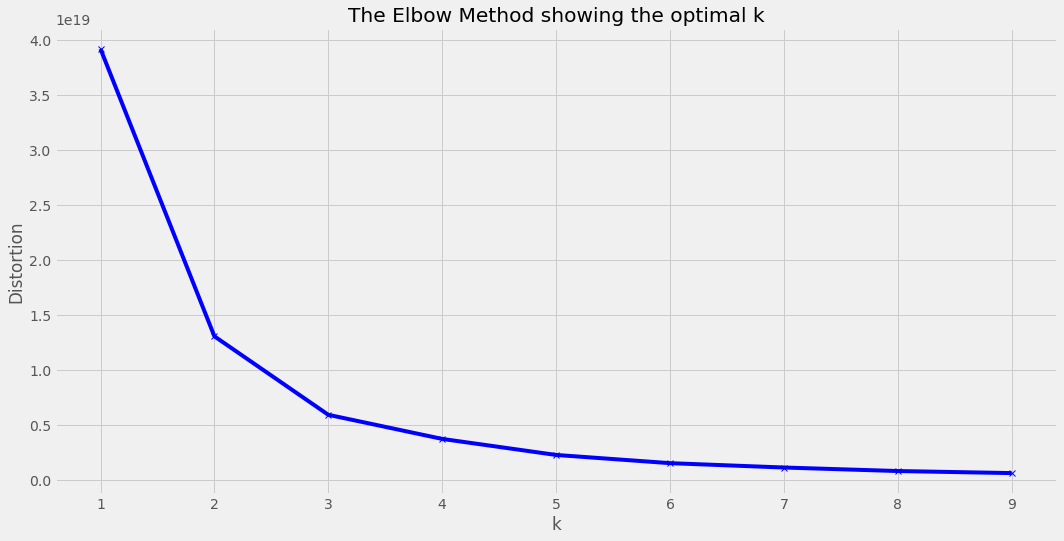

In [83]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [84]:
model = KMeans(3, verbose=0)
model.fit(X)

KMeans(n_clusters=3)

In [85]:
print(model.cluster_centers_.shape)
model.cluster_centers_

(3, 14)


array([[ 1.03055008e-03, -8.07270088e-04, -2.46223036e-03,
        -3.23429085e-02, -3.23255071e-02, -3.25749081e-02,
        -3.27324109e-02, -3.27347621e-02, -3.30984381e-02,
        -3.27629902e-02, -3.25076692e-02, -3.30811691e-02,
        -3.30929450e-02, -3.27913346e-02],
       [-4.36413128e-01,  3.69654919e-01,  1.20638715e+00,
         4.98512258e+01,  4.96326335e+01,  4.96857510e+01,
         4.93463536e+01,  4.97085676e+01,  4.97113508e+01,
         4.98949811e+01,  5.04084097e+01,  4.92701663e+01,
         5.00538291e+01,  4.98448805e+01],
       [-4.59903460e-01,  3.56554260e-01,  1.07699366e+00,
         9.61302808e+00,  9.63342545e+00,  9.75172535e+00,
         9.87616025e+00,  9.82904702e+00,  1.00115080e+01,
         9.81838313e+00,  9.62156762e+00,  1.00616509e+01,
         9.96308270e+00,  9.83931287e+00]])

In [86]:
print(model.labels_.shape)
model.labels_

(37790,)


array([0, 0, 0, ..., 0, 0, 0])

In [87]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
37785,0
37786,0
37787,0
37788,0


In [88]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
cropsnew1.insert((cropsnew1.shape[1]), 'kmeans', kmeans_labels)

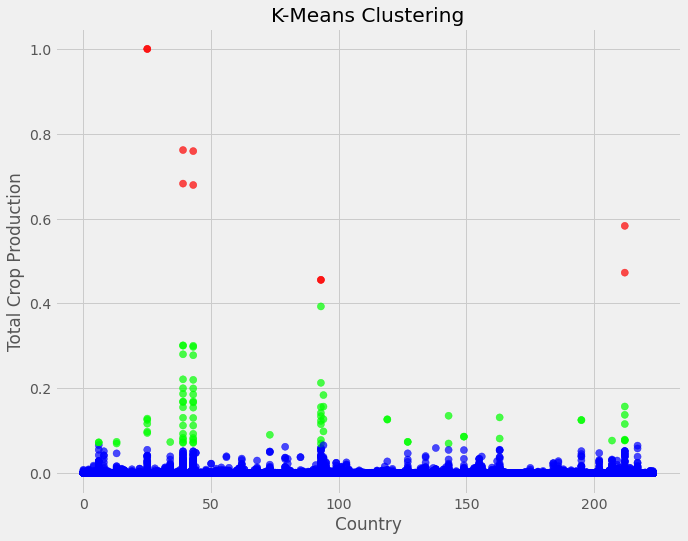

In [90]:
v1 = cropsnew1['Area']
v2 = cropsnew1['newsum']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='brg',alpha=0.7)
ax.set_title('K-Means Clustering')
ax.set_xlabel("Country")
ax.set_ylabel("Total Crop Production")
plt.show()